<a href="https://colab.research.google.com/github/Monyque553/projeto1_si/blob/main/projeto_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas e do dataset Abalone



In [4]:
!pip install ucimlrepo

## Importação das bibliotecas

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pandas.api.types import is_numeric_dtype
import warnings
from ucimlrepo import fetch_ucirepo
from IPython.display import display, HTML

In [6]:
abalone = fetch_ucirepo(id=1)

X = abalone.data.features
y = abalone.data.targets

# Análise Exploratória dos dados

##  O que são abalones

#####Abalones são caracóis marinhos da família Haliotidae, que possui apenas um gênero, Haliotis. Originalmente, Haliotis tinha seis subgêneros, que agora são representações alternativas do gênero. O número de espécies de abalones reconhecidas mundialmente varia entre 30 e 130, com mais de 230 táxons descritos. O tratamento mais abrangente reconhece 56 espécies válidas e 18 subespécies adicionais.

## Sobre o Abalone Dataset

O Abalone Dataset foi publicado originalmente no UCI Machine Learning Repository e pode ser encontrado em [UCI Abalone Dataset](https://archive.ics.uci.edu/dataset/1/abalone). O problema original declarado é estimar a idade de um abalone, que pode ser determinada a partir do número de anéis na sua concha. No entanto, contar o número de anéis é um método caro. Assim, uma solução possível é prever o número de anéis de um abalone com base em características como altura, diâmetro, comprimento e medições de peso.

## Configurações iniciais

In [ ]:
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
%matplotlib inline

## Combina os dados e as variáveis alvo em um único DataFrame

In [10]:
abalone_df = X.copy()
abalone_df['Rings'] = y

## Codificação one-hot para a variável 'Sex'

In [11]:
abalone_df = pd.get_dummies(abalone_df, columns=['Sex'], drop_first=False)

## Primeiras linhas do dataset

In [12]:
display(abalone_df.head())

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


## Informações básicas do conjunto de dados

In [ ]:
display(abalone_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole_weight    4177 non-null   float64
 4   Shucked_weight  4177 non-null   float64
 5   Viscera_weight  4177 non-null   float64
 6   Shell_weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Sex_F           4177 non-null   bool   
 9   Sex_I           4177 non-null   bool   
 10  Sex_M           4177 non-null   bool   
dtypes: bool(3), float64(7), int64(1)
memory usage: 273.4 KB


None

## Estatísticas descritivas do conjunto de dados

In [ ]:
display(abalone_df.describe())

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Distribuição das classes (sexo)

a variável Sex do dataset é categórica e possui três valores possíveis:
* 'M' (Masculino)
* 'F' (Feminino)
* 'I' (Indeterminado)

Para incluir essa variável em nossa analise, nós utilizamos a codificação one-hot para transformá-la em variáveis dummy. Isso criou colunas separadas para cada categoria, com valores binários (0 ou 1) indicando a presença ou ausência de cada categoria.



### Gráfico de barras para distribuição das classes (Sexo)

In [ ]:
sex_counts = abalone_df[['Sex_F', 'Sex_I', 'Sex_M']].sum()
fig = px.bar(x=sex_counts.index, y=sex_counts.values, labels={'x': 'Sexo', 'y': 'Frequência'},
             title='Distribuição de Abalones por Sexo')
fig.show()

## Distribuição de anéis

In [ ]:
fig = px.histogram(abalone_df, x='Rings', nbins=15, title='Distribuição do Número de Anéis (Rings)',
                   labels={'Rings': 'Número de Anéis'}, marginal='box', histnorm='probability')
fig.show()

## Análise de correlação incluindo variáveis dummy

A matriz de correlação é uma tabela que mostra o quanto duas variáveis estão relacionadas entre si. Ela contém números que variam de -1 a 1:

* 1: Significa uma correlação positiva perfeita. Isso quer dizer que quando uma variável aumenta, a outra também aumenta na mesma proporção.
* 0: Significa que não há relação linear entre as variáveis. Elas são independentes uma da outra.
* -1: Significa uma correlação negativa perfeita. Isso quer dizer que quando uma variável aumenta, a outra diminui na mesma proporção.

A matriz de correlação neste caso nos ajuda a entender como as variáveis do dataset se movem juntas. Se duas variáveis têm uma correlação alta, isso significa que elas tendem a se mover na mesma direção. Se elas têm uma correlação baixa ou negativa, isso significa que elas se movem em direções opostas ou são independentes uma da outra.

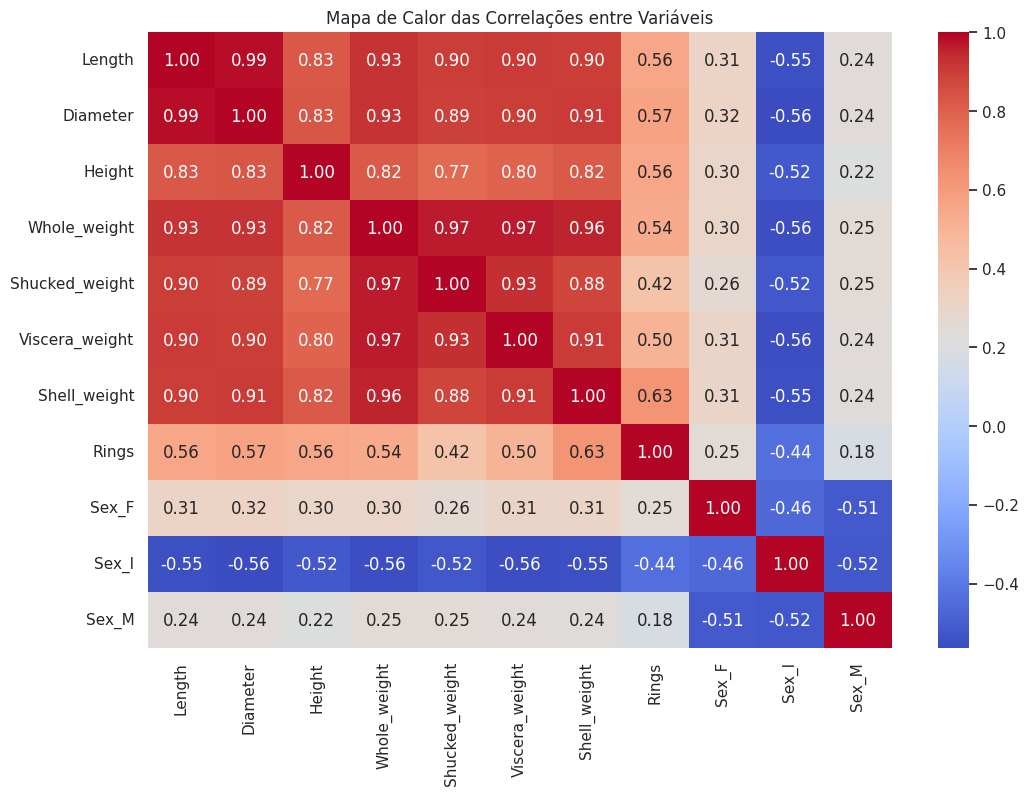

In [ ]:
corr = abalone_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações entre Variáveis')
plt.show()

## Visualização das características numéricas por Rings

In [ ]:
numeric_features = abalone_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Rings')  #retirei 'Rings' para evitar repetição na visualização

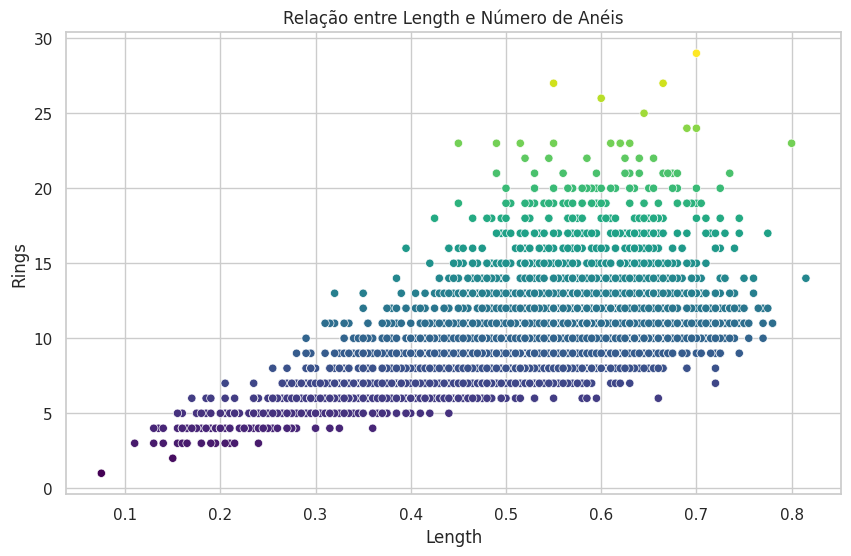

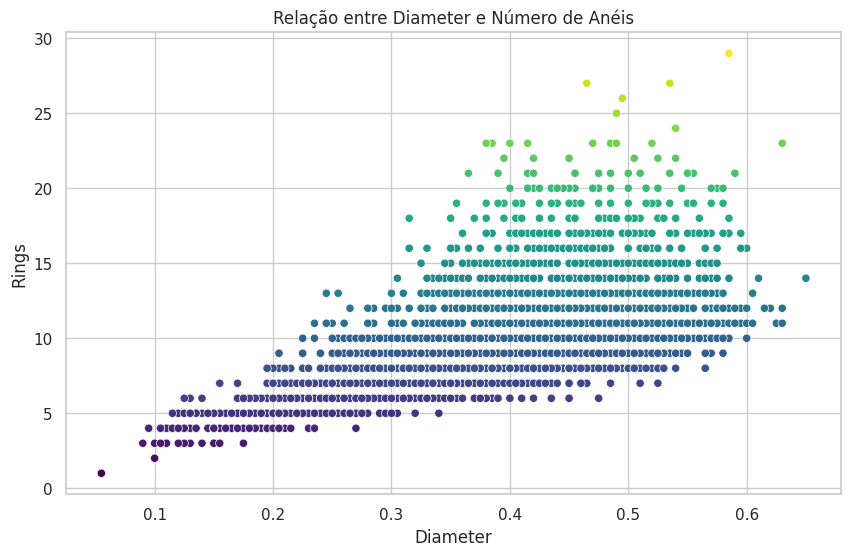

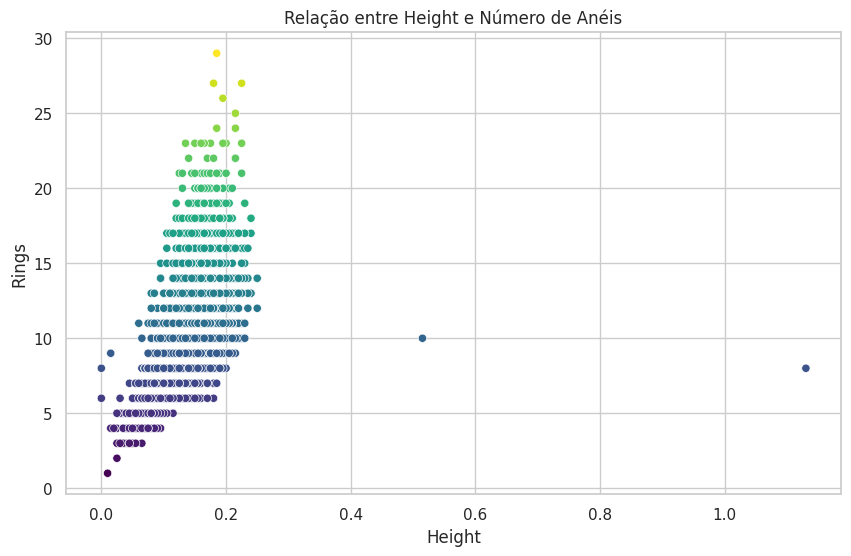

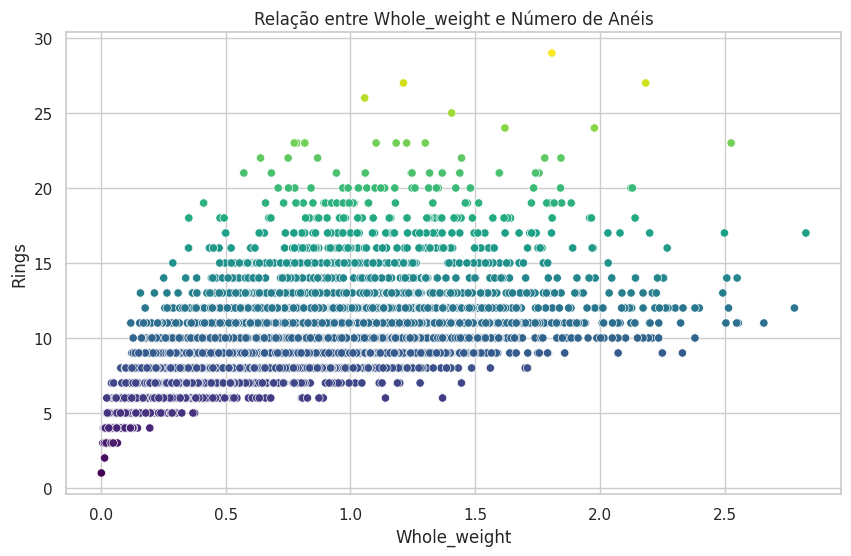

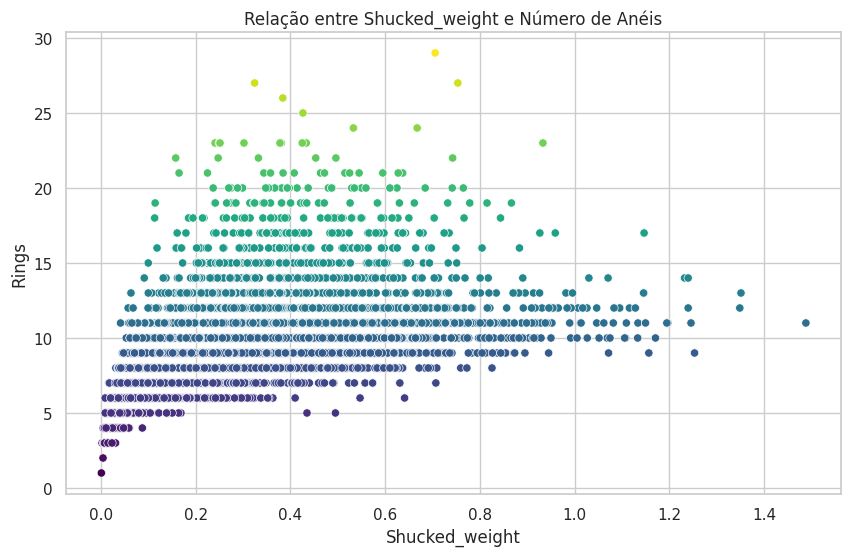

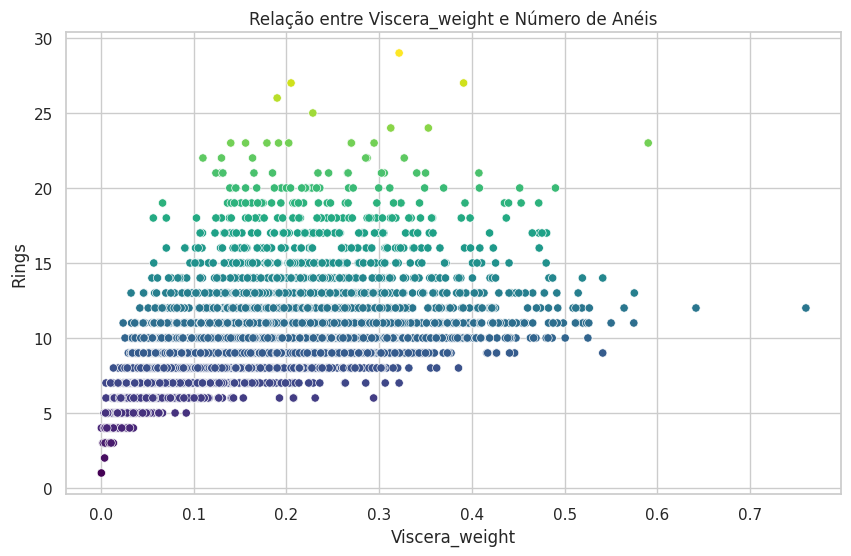

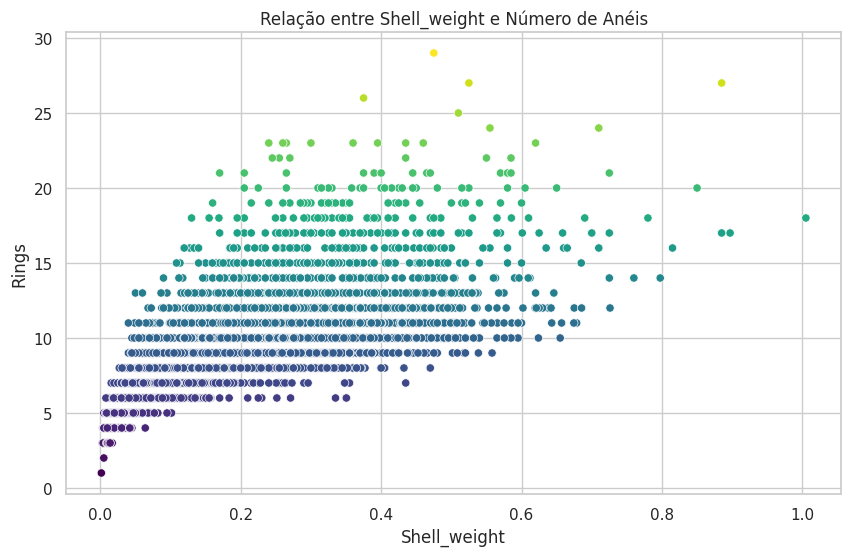

In [ ]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Rings', data=abalone_df, hue='Rings', palette='viridis', legend=None)
    plt.title(f'Relação entre {feature} e Número de Anéis')
    plt.xlabel(feature)
    plt.ylabel('Rings')
    plt.show()

## Pairplot para visualizar relações entre todas as variáveis numéricas e Rings

<Figure size 1200x1000 with 0 Axes>

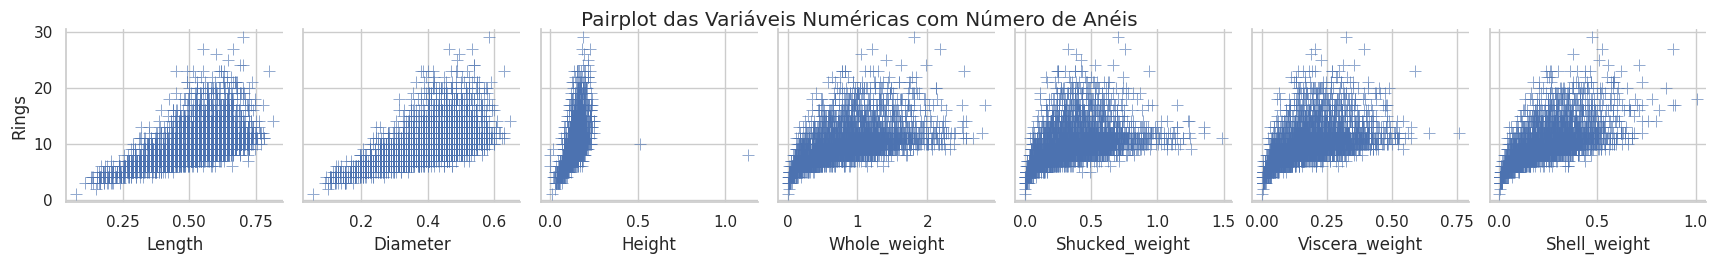

In [ ]:
plt.figure(figsize=(12, 10))
sns.pairplot(abalone_df, diag_kind='kde', markers='+', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             y_vars=['Rings'], x_vars=numeric_features)
plt.suptitle('Pairplot das Variáveis Numéricas com Número de Anéis', y=1.02)
plt.show()

## Detecção de outliers usando boxplots para cada variável numérica em relação a Rings

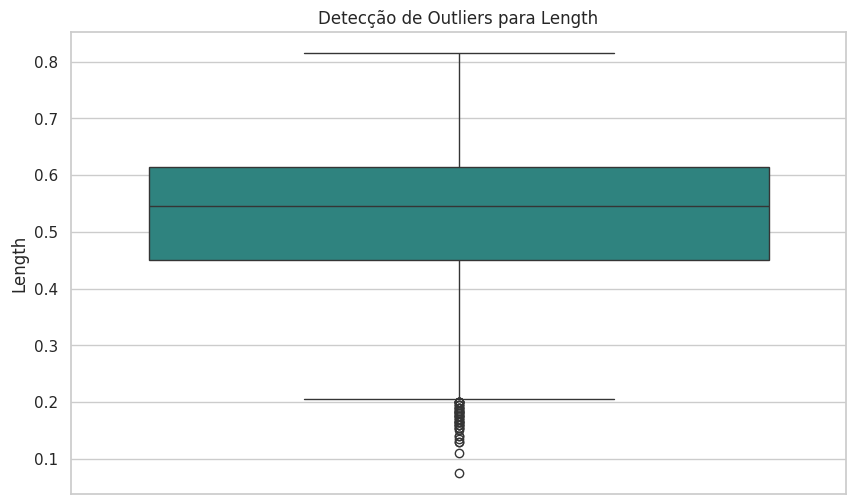

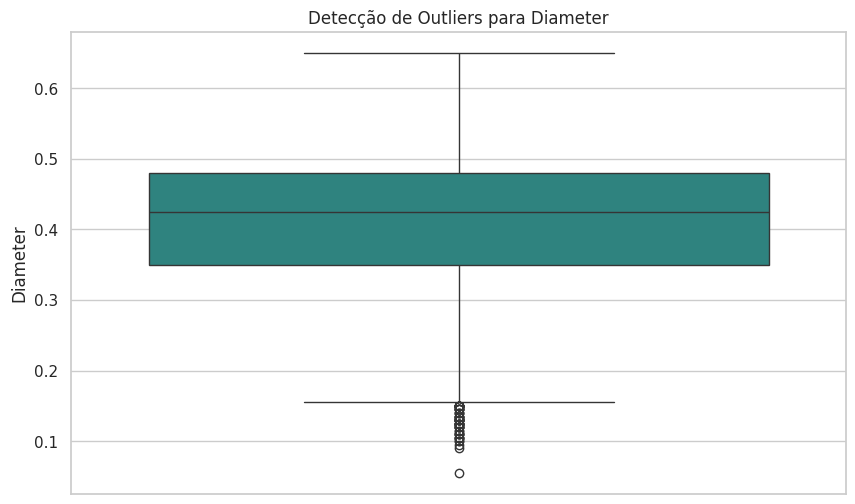

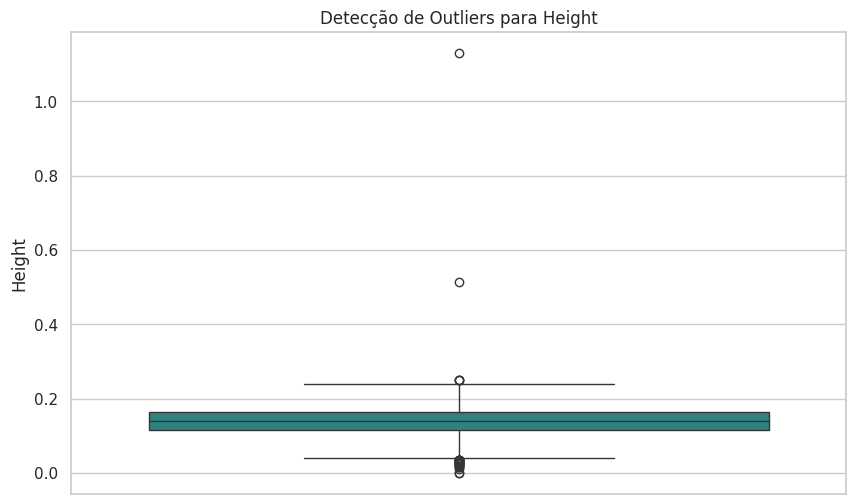

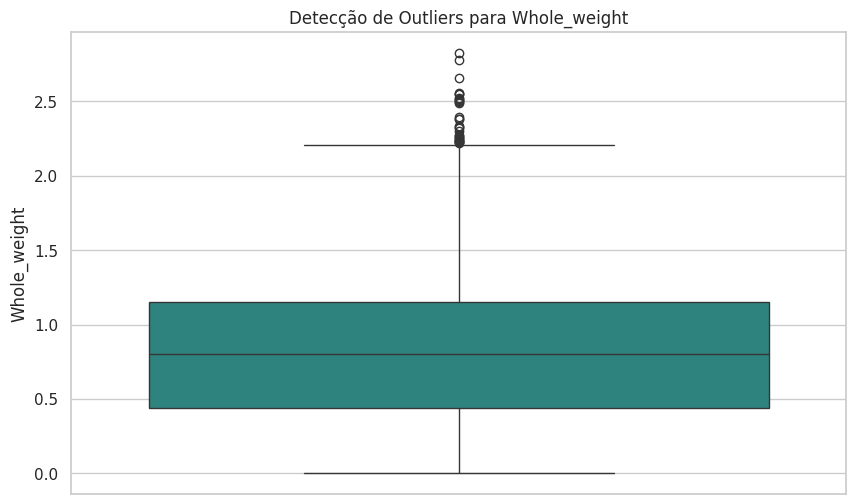

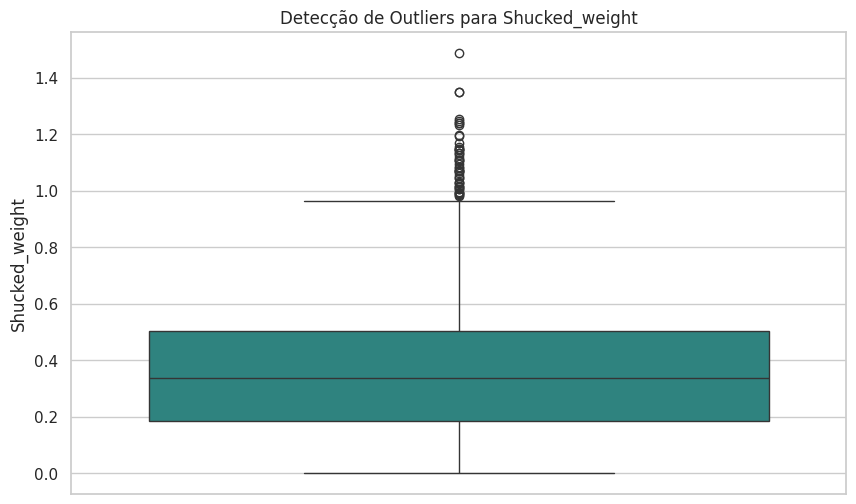

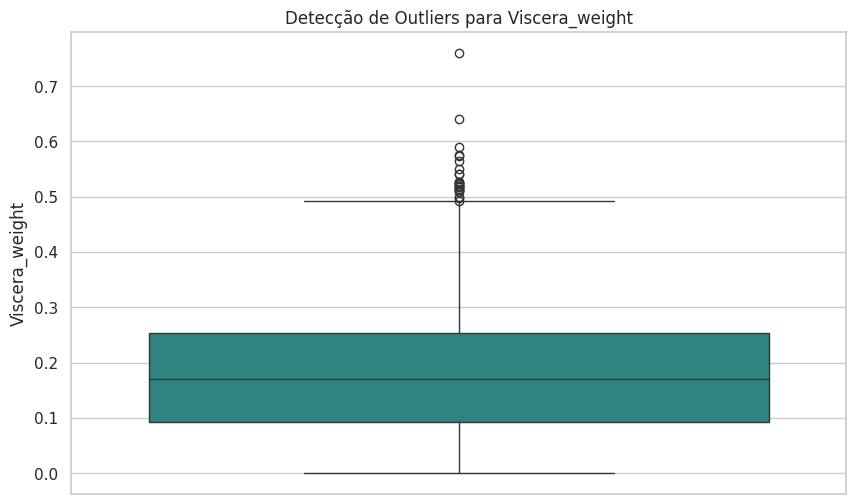

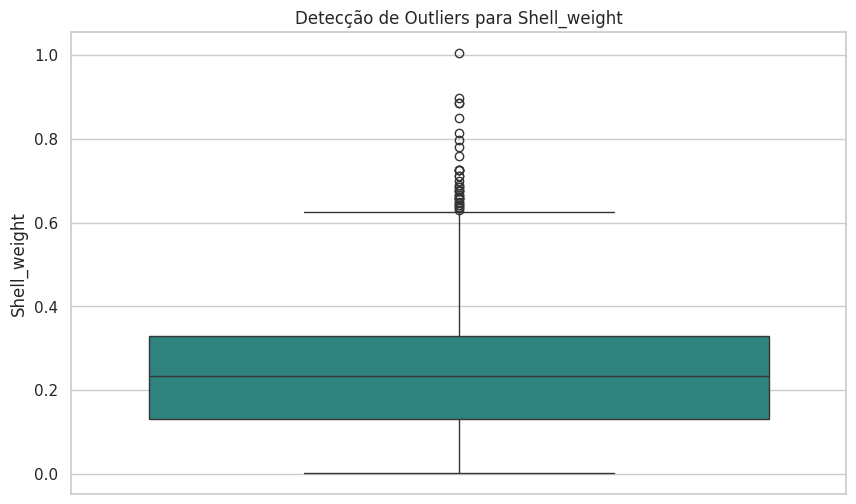

In [ ]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=abalone_df, y=feature, palette='viridis')
    plt.title(f'Detecção de Outliers para {feature}')
    plt.ylabel(feature)
    plt.show()

## Metadados

In [ ]:
display(HTML("<h3>Metadados:</h3>"))
print(abalone.metadata)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

## Variáveis

In [ ]:
display(HTML("<h3>Variáveis:</h3>"))
print(abalone.variables)

             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7        

# Rede Neural usando backpropagation

## Importação das bibliotecas

In [7]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.6 MB/s eta 0:00:00


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

## Divisão dos dados em conjunto de treino e teste

In [13]:
numeric_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
X_numeric = abalone_df[numeric_features + ['Sex_F', 'Sex_I', 'Sex_M']]
y = abalone_df['Rings']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

## Normalização dos dados

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### testando um turner search

In [ ]:
def build_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                                    activation='relu',
                                    input_shape=(X_train_scaled.shape[1],)))
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(tf.keras.layers.Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32),
                                    activation='relu'))
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(tf.keras.layers.Dense(units=hp.Int('units_3', min_value=32, max_value=512, step=32),
                                    activation='relu'))
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(tf.keras.layers.Dense(1, activation='linear'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])

    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='keras_tuner_demo'
)

In [ ]:
tuner.search(X_train_scaled, y_train, epochs=400, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

Trial 10 Complete [00h 00m 49s]
val_mean_squared_error: 4.0189448595047

Best val_mean_squared_error So Far: 3.772925853729248
Total elapsed time: 00h 10m 53s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Melhor número de unidades na primeira camada: {best_hps.get('units_1')}
Melhor número de unidades na segunda camada: {best_hps.get('units_2')}
Melhor número de unidades na terceira camada: {best_hps.get('units_3')}
Melhor taxa de dropout na primeira camada: {best_hps.get('dropout_1')}
Melhor taxa de dropout na segunda camada: {best_hps.get('dropout_2')}
Melhor taxa de dropout na terceira camada: {best_hps.get('dropout_3')}
Melhor taxa de aprendizado: {best_hps.get('learning_rate')}
""")


Melhor número de unidades na primeira camada: 352
Melhor número de unidades na segunda camada: 384
Melhor número de unidades na terceira camada: 128
Melhor taxa de dropout na primeira camada: 0.2
Melhor taxa de dropout na segunda camada: 0.30000000000000004
Melhor taxa de dropout na terceira camada: 0.30000000000000004
Melhor taxa de aprendizado: 0.0008213805680931154



## Construir o modelo com os melhores hiperparâmetros do turner search

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, y_train, epochs=400, validation_split=0.2)

Epoch 1/400
84/84 [==============================] - 2s 9ms/step - loss: 26.0733 - mean_squared_error: 26.0733 - val_loss: 5.6497 - val_mean_squared_error: 5.6497
Epoch 2/400
84/84 [==============================] - 1s 7ms/step - loss: 9.2756 - mean_squared_error: 9.2756 - val_loss: 4.3115 - val_mean_squared_error: 4.3115
Epoch 3/400
84/84 [==============================] - 1s 7ms/step - loss: 8.2071 - mean_squared_error: 8.2071 - val_loss: 4.2413 - val_mean_squared_error: 4.2413
Epoch 4/400
84/84 [==============================] - 1s 7ms/step - loss: 7.0685 - mean_squared_error: 7.0685 - val_loss: 4.3771 - val_mean_squared_error: 4.3771
Epoch 5/400
84/84 [==============================] - 1s 7ms/step - loss: 6.6854 - mean_squared_error: 6.6854 - val_loss: 4.3787 - val_mean_squared_error: 4.3787
Epoch 6/400
84/84 [==============================] - 1s 7ms/step - loss: 6.6997 - mean_squared_error: 6.6997 - val_loss: 4.0623 - val_mean_squared_error: 4.0623
Epoch 7/400
84/84 [=============

## Avaliar o modelo do turner search

In [ ]:
loss = model.evaluate(X_test_scaled, y_test)
print("Erro médio quadrático no conjunto de teste:", loss)

27/27 [==============================] - 0s 5ms/step - loss: 5.4803 - mean_squared_error: 5.4803
Erro médio quadrático no conjunto de teste: [5.4803080558776855, 5.4803080558776855]


## Construção do modelo conforme o diagrama fornecido (sem turner search)

## arquitetura

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='linear')
])

## Compilação do modelo


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

## Treinamento do modelo

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=400, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/400
84/84 [==============================] - 3s 11ms/step - loss: 8.9334 - val_loss: 8.9895
Epoch 2/400
84/84 [==============================] - 1s 10ms/step - loss: 8.9334 - val_loss: 8.9895
Epoch 3/400
84/84 [==============================] - 1s 7ms/step - loss: 8.9334 - val_loss: 8.9895
Epoch 4/400
84/84 [==============================] - 1s 7ms/step - loss: 8.9334 - val_loss: 8.9895
Epoch 5/400
84/84 [==============================] - 1s 9ms/step - loss: 8.9334 - val_loss: 8.9895
Epoch 6/400
84/84 [==============================] - 1s 9ms/step - loss: 8.9334 - val_loss: 8.9895
Epoch 7/400
84/84 [==============================] - 1s 9ms/step - loss: 8.9334 - val_loss: 8.9895
Epoch 8/400
84/84 [==============================] - 1s 8ms/step - loss: 8.9334 - val_loss: 8.9895
Epoch 9/400
84/84 [==============================] - 0s 3ms/step - loss: 8.9334 - val_loss: 8.9895
Epoch 10/400
84/84 [==============================] - 0s 3ms/step - loss: 8.9334 - val_loss: 8.9895
Epoch 1

## Avaliação do modelo

In [ ]:
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Erro médio absoluto no conjunto de teste:", loss)

from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, R^2: {r2}")

Erro médio absoluto no conjunto de teste: 1.441582441329956
27/27 [==============================] - 0s 2ms/step
MAE: 1.441582646951721, R^2: 0.5858500897794596


In [ ]:
model.save('meu_modelo.h5')

### Gráfico de Perda durante o Treinamento

Este gráfico nos mostra se o modelo está aprendendo bem. Se a perda de validação começar a aumentar enquanto a perda de treinamento continua a diminuir, o modelo provavelmente está com overfitting

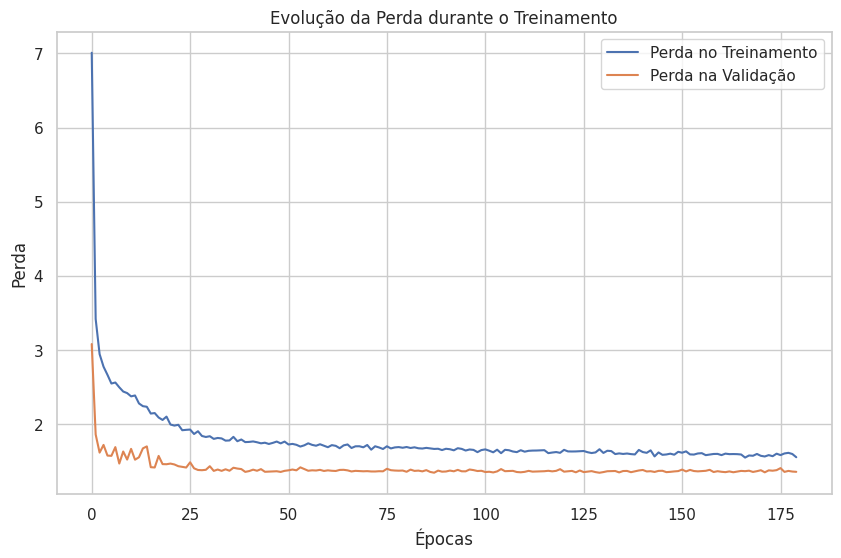

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Perda no Treinamento')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Evolução da Perda durante o Treinamento')
plt.legend()
plt.show()

### 3. Gráfico de Dispersão de Valores Preditos vs. Reais

Idealmente, os pontos devem estar próximos da linha y=x, indicando que as previsões estão próximas dos valores reais

27/27 [==============================] - 0s 2ms/step


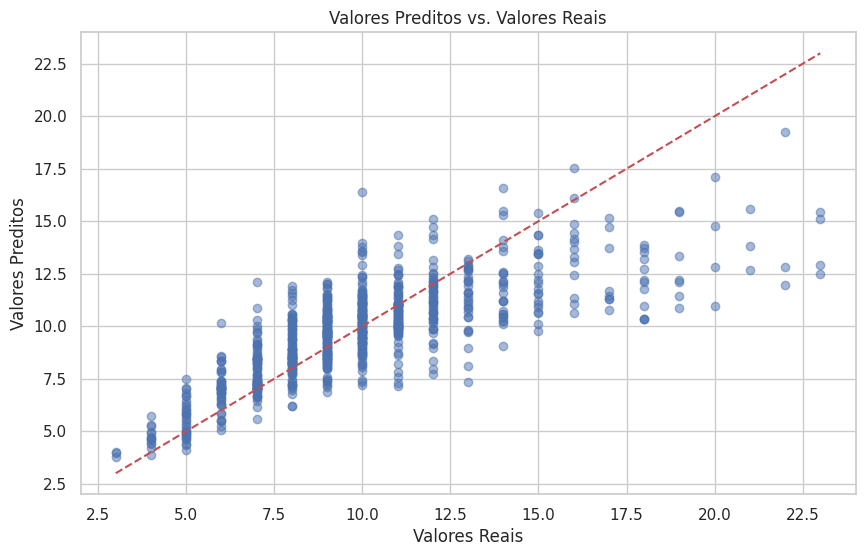

In [ ]:
y_pred = model.predict(X_test_scaled)

y_test_array = y_test.to_numpy().flatten()
y_pred_array = y_pred.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_array, y_pred_array, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Preditos vs. Valores Reais')
plt.plot([min(y_test_array), max(y_test_array)], [min(y_test_array), max(y_test_array)], 'r--')
plt.show()

### 4. Resíduos (Erros) vs. Valores Preditos

este gráfico nos ajuda a identificar se há algum padrão nos erros. Se os resíduos estão distribuídos aleatoriamente ao redor de zero, é um bom sinal

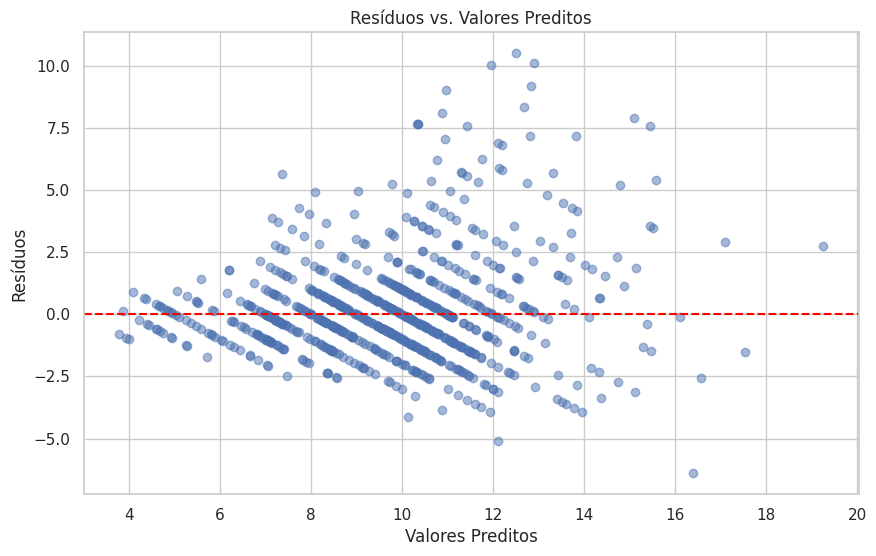

In [ ]:
residuos = y_test_array - y_pred_array

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_array, residuos, alpha=0.5)
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Preditos')
plt.axhline(0, color='red', linestyle='--')
plt.show()

### Histograma dos Resíduos

Esse histograma nos mostra a distribuição dos erros. Neste caso, uma distribuição normal centrada em zero é desejável, indicando que não há viés significativo nas previsões

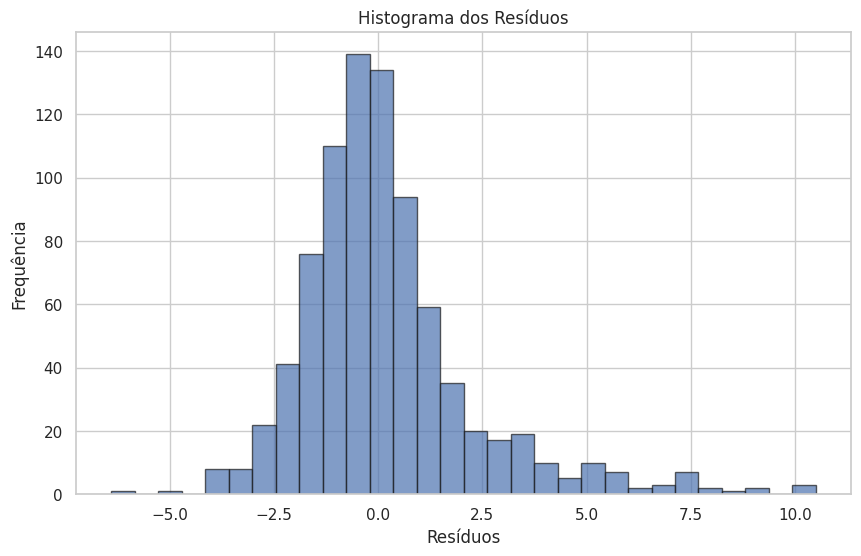

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

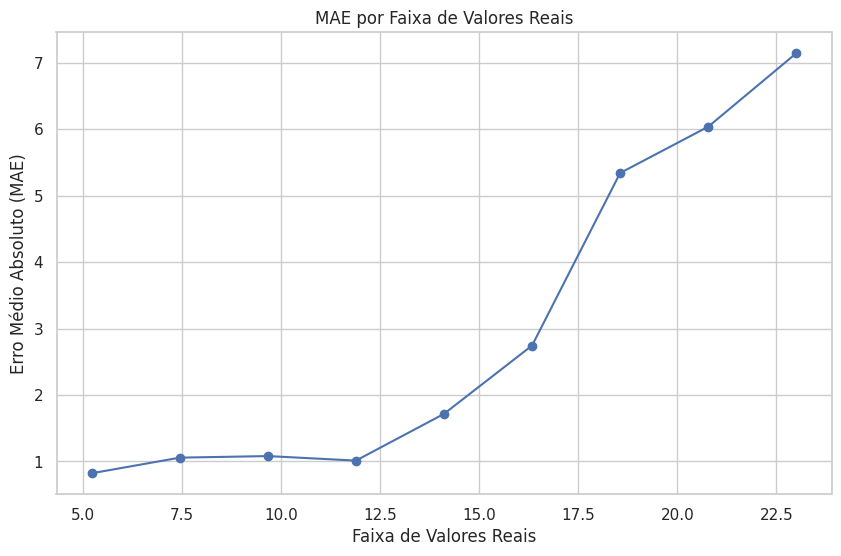

In [ ]:
bins = np.linspace(min(y_test), max(y_test), 10)
y_binned = np.digitize(y_test, bins)
mae_per_bin = [np.mean(np.abs(residuos[y_binned == i])) for i in range(1, len(bins))]

plt.figure(figsize=(10, 6))
plt.plot(bins[1:], mae_per_bin, marker='o')
plt.xlabel('Faixa de Valores Reais')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.title('MAE por Faixa de Valores Reais')
plt.show()

# SVM

## Importando as bibliotecas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Definindo variaveis e caracteristicas

In [ ]:
numeric_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
X = abalone_df[numeric_features + ['Sex_F', 'Sex_I', 'Sex_M']]
y = abalone_df['Rings']

## Divisão dos dados em conjunto de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalização dos dados

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Inicializar e treinar o modelo SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("Melhores Parâmetros: ", grid_search.best_params_)

Melhores Parâmetros:  {'C': 10, 'epsilon': 1, 'kernel': 'rbf'}


## Modelo SVM com os melhores parâmetros

In [ ]:
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train_scaled, y_train)

SVR(C=10, epsilon=1)

## Avaliação do Modelo

In [ ]:
y_pred_svm = best_svm_model.predict(X_test_scaled)
residuos_svm = y_test - y_pred_svm

## Calcular o erro médio quadrático

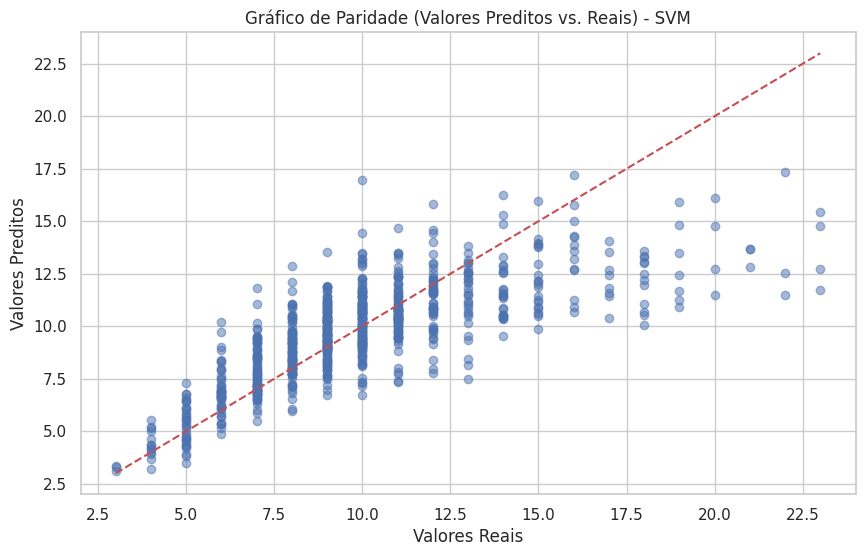

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Gráfico de Paridade (Valores Preditos vs. Reais) - SVM')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()


In [ ]:
# Calcula as métricas
mse = mean_squared_error(y_test, y_pred_svm)
mae = mean_absolute_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)

# Imprime as métricas
print("Erro Médio Quadrático (MSE):", mse)
print("Erro Médio Absoluto (MAE):", mae)
print("Coeficiente de Determinação (R^2):", r2)

Erro Médio Quadrático (MSE): 4.745314731666214
Erro Médio Absoluto (MAE): 1.4961046693264035
Coeficiente de Determinação (R^2): 0.5616422488158934



#treinamento KNN



In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Criar o regressor KNN
knn = KNeighborsRegressor()

# Ajuste de hiperparâmetros usando GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 900)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train_scaled, y_train)

# Melhor valor de k
print(f"Melhor valor de k: {knn_cv.best_params_['n_neighbors']}")

# Treinar o modelo com o melhor valor de k
knn = KNeighborsRegressor(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Melhor valor de k: 11
Mean Absolute Error (MAE): 1.5730752501087428
Mean Squared Error (MSE): 5.131835976116099
Root Mean Squared Error (RMSE): 2.265355595953116
R-squared: 0.5259365911128815


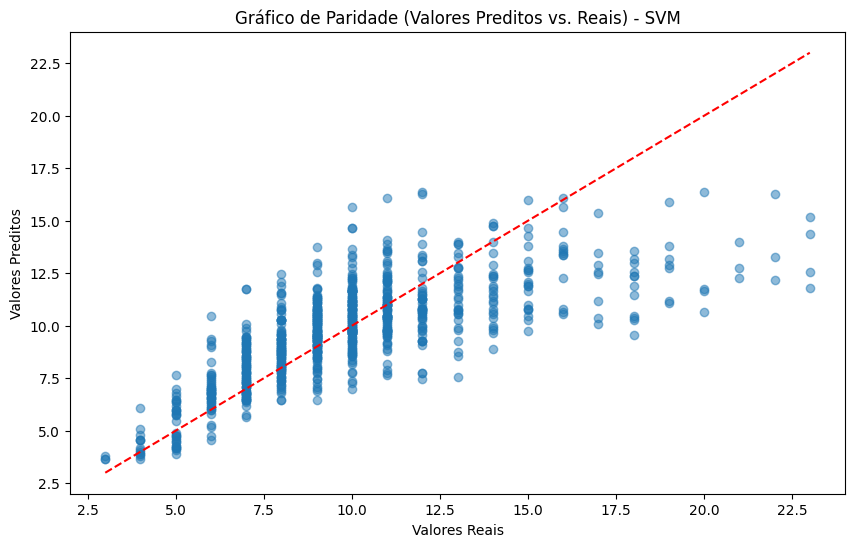

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Gráfico de Paridade (Valores Preditos vs. Reais) - SVM')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

##Árvore de Decisão

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

tree = DecisionTreeRegressor(random_state=42)

# Ajuste de hiperparâmetros usando GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
tree_cv = GridSearchCV(tree, param_grid, cv=5)
tree_cv.fit(X_train_scaled, y_train)

print(f"Melhor combinação de hiperparâmetros: {tree_cv.best_params_}")

best_tree = DecisionTreeRegressor(**tree_cv.best_params_, random_state=42)
best_tree.fit(X_train_scaled, y_train)

# Prever no conjunto de teste
y_pred = best_tree.predict(X_test_scaled)

# Calcular as métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")





Melhor combinação de hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mean Absolute Error (MAE): 1.6742413080283236
Mean Squared Error (MSE): 5.814127824264278
Root Mean Squared Error (RMSE): 2.411250261641101
R-squared: 0.4629085440563555


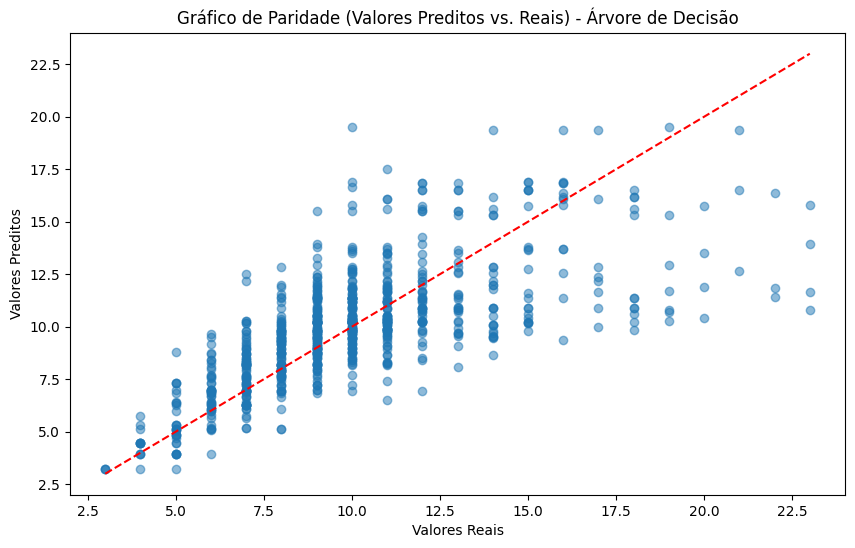

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Gráfico de Paridade (Valores Preditos vs. Reais) - Árvore de Decisão')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()